# Load Packages

In [1]:
import pandas as pd
import time
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Create Cluster to Find Important Features in High Goal Range

In [2]:
df = pd.read_csv("Cluster_1.csv")

In [3]:
my_tab = pd.crosstab(index=df["Goals_Proxy"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab 

col_0,count
Goals_Proxy,
High,19
Low,10
Mid,12


In [4]:
a = df.loc[df['Goals_Proxy']=='Low']
a.head()

,field1,Knockout,OnTarget_%,Short_%,Succ_Ratio,OppTackles_Successful%,Opp_Aggressiveness,Opp_Saves/Shots,Opp_Shots_Blocked,Opp_Conceded_Corners,dummy_home,dummy_away,bad_weather,Win_Pr(),Btts_Pr(),Goals_Proxy
0,99,-0.704078,0.938165,-1.137709,-0.765695,-0.398141,-0.654654,0.443323,0.654060,0.818039,1,-1,-0.398673,0.673766,0.591671,Low
1,22,-0.704078,0.355299,-0.072458,-0.938161,-0.361717,1.527525,-0.475099,-0.046004,0.653017,1,-1,-0.398673,-1.169902,-0.544854,Low
2,26,-0.704078,-0.054819,-1.283677,-0.199018,-0.092178,-0.654654,-1.323192,-0.746068,-0.832184,1,-1,-0.398673,1.184906,-0.428803,Low
3,150,-0.704078,-1.277372,-0.638705,1.614347,1.698332,-0.654654,0.703956,1.587478,-0.007072,1,-1,-0.398673,1.256480,-1.130787,Low
4,163,-0.704078,-0.892888,-1.537533,0.344991,-0.199994,-0.654654,-1.551525,-0.746068,-0.502139,1,-1,-0.398673,0.867546,0.518547,Low


In [5]:
b = df.loc[df['Goals_Proxy']=='High']
b.head()

,field1,Knockout,OnTarget_%,Short_%,Succ_Ratio,OppTackles_Successful%,Opp_Aggressiveness,Opp_Saves/Shots,Opp_Shots_Blocked,Opp_Conceded_Corners,dummy_home,dummy_away,bad_weather,Win_Pr(),Btts_Pr(),Goals_Proxy
22,8,-0.704078,-0.054819,-1.770235,-1.126307,1.133000,1.527525,0.695268,0.420705,0.983061,1,-1,-0.398673,0.902431,-0.544854,High
23,27,-0.704078,0.383262,-0.553840,-0.879030,1.632872,-0.654654,0.339069,-0.046004,2.138217,1,-1,-0.398673,0.002956,0.135515,High
24,19,-0.704078,-0.492901,-2.074334,-0.199018,-0.116681,-0.654654,-0.729527,-0.979423,0.322972,1,-1,-0.398673,1.611329,-0.428803,High
25,36,-0.704078,-0.755749,-1.283677,0.523494,-1.183483,1.527525,-1.323192,-0.746068,-0.502139,1,-1,-0.398673,1.241923,0.518547,High
26,40,-0.704078,-0.492901,0.905834,-0.369021,1.429221,1.527525,-2.135575,-1.212777,0.157950,1,-1,-0.398673,0.902431,0.518547,High


In [6]:
c = df.loc[df['Goals_Proxy']=='Mid']
c.head()

,field1,Knockout,OnTarget_%,Short_%,Succ_Ratio,OppTackles_Successful%,Opp_Aggressiveness,Opp_Saves/Shots,Opp_Shots_Blocked,Opp_Conceded_Corners,dummy_home,dummy_away,bad_weather,Win_Pr(),Btts_Pr(),Goals_Proxy
10,32,-0.704078,0.707061,-1.537533,-1.559042,0.886149,-0.654654,-1.798124,-0.979423,-0.997206,1,-1,-0.398673,1.541460,-1.204445,Mid
11,152,-0.704078,-0.728791,-1.059112,-1.559042,0.446900,-0.654654,-2.332422,-0.746068,-0.337117,1,-1,-0.398673,1.524393,-2.069242,Mid
12,141,-0.704078,0.529289,-0.797119,-0.236796,-0.810949,1.527525,0.476953,0.420705,-0.337117,1,-1,-0.398673,1.012051,-1.130787,Mid
13,47,-0.704078,-2.537280,-1.648595,1.614347,0.577586,-0.654654,-0.729527,-0.279359,-0.007072,1,-1,-0.398673,1.647258,-1.768443,Mid
14,157,-0.704078,0.529289,-0.797119,-0.236796,-0.047255,1.527525,-0.100941,-0.279359,-0.172095,1,-1,-0.398673,0.209542,-0.428803,Mid


In [7]:
#LTV_potential = Low -> 1
df.loc[df['Goals_Proxy'].str.contains('Low'),'Goals_proxy_num'] = 1

#LTV_potential = Mid -> 2
df.loc[df['Goals_Proxy'].str.contains('Mid'),'Goals_proxy_num'] = 2

#LTV_potential = High -> 3
df.loc[df['Goals_Proxy'].str.contains('High'),'Goals_proxy_num'] = 3

In [8]:
df.drop(['Goals_Proxy'],axis=1,inplace=True)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
print(len(df.columns))

16


In [11]:
df.dtypes

field1                      int64
Knockout                  float64
OnTarget_%                float64
Short_%                   float64
Succ_Ratio                float64
OppTackles_Successful%    float64
Opp_Aggressiveness        float64
Opp_Saves/Shots           float64
Opp_Shots_Blocked         float64
Opp_Conceded_Corners      float64
dummy_home                  int64
dummy_away                  int64
bad_weather               float64
Win_Pr()                  float64
Btts_Pr()                 float64
Goals_proxy_num           float64
dtype: object

In [14]:
# Separating X and y
X = df.drop(['Goals_proxy_num','field1'], axis=1)
y = df.Goals_proxy_num
X.head()

,Knockout,OnTarget_%,Short_%,Succ_Ratio,OppTackles_Successful%,Opp_Aggressiveness,Opp_Saves/Shots,Opp_Shots_Blocked,Opp_Conceded_Corners,dummy_home,dummy_away,bad_weather,Win_Pr(),Btts_Pr()
0,-0.704078,0.938165,-1.137709,-0.765695,-0.398141,-0.654654,0.443323,0.654060,0.818039,1,-1,-0.398673,0.673766,0.591671
1,-0.704078,0.355299,-0.072458,-0.938161,-0.361717,1.527525,-0.475099,-0.046004,0.653017,1,-1,-0.398673,-1.169902,-0.544854
2,-0.704078,-0.054819,-1.283677,-0.199018,-0.092178,-0.654654,-1.323192,-0.746068,-0.832184,1,-1,-0.398673,1.184906,-0.428803
3,-0.704078,-1.277372,-0.638705,1.614347,1.698332,-0.654654,0.703956,1.587478,-0.007072,1,-1,-0.398673,1.256480,-1.130787
4,-0.704078,-0.892888,-1.537533,0.344991,-0.199994,-0.654654,-1.551525,-0.746068,-0.502139,1,-1,-0.398673,0.867546,0.518547


# XGBoost

In [15]:
# XGBoost
#evaluated with train & test - remember we have a high variance !  

seed=7
test_size=0.4

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# instantied the model
model=xgb.XGBClassifier()

# train the model on training data
model.fit(X_train, y_train)

# make predictions using tesst data
y_predict=model.predict(X_test)

# evaluate the predictions
accuracy = accuracy_score(y_test, y_predict)

print(f'XGBoost - Accuracy {accuracy*100:.3f}%')


XGBoost - Accuracy 35.294%


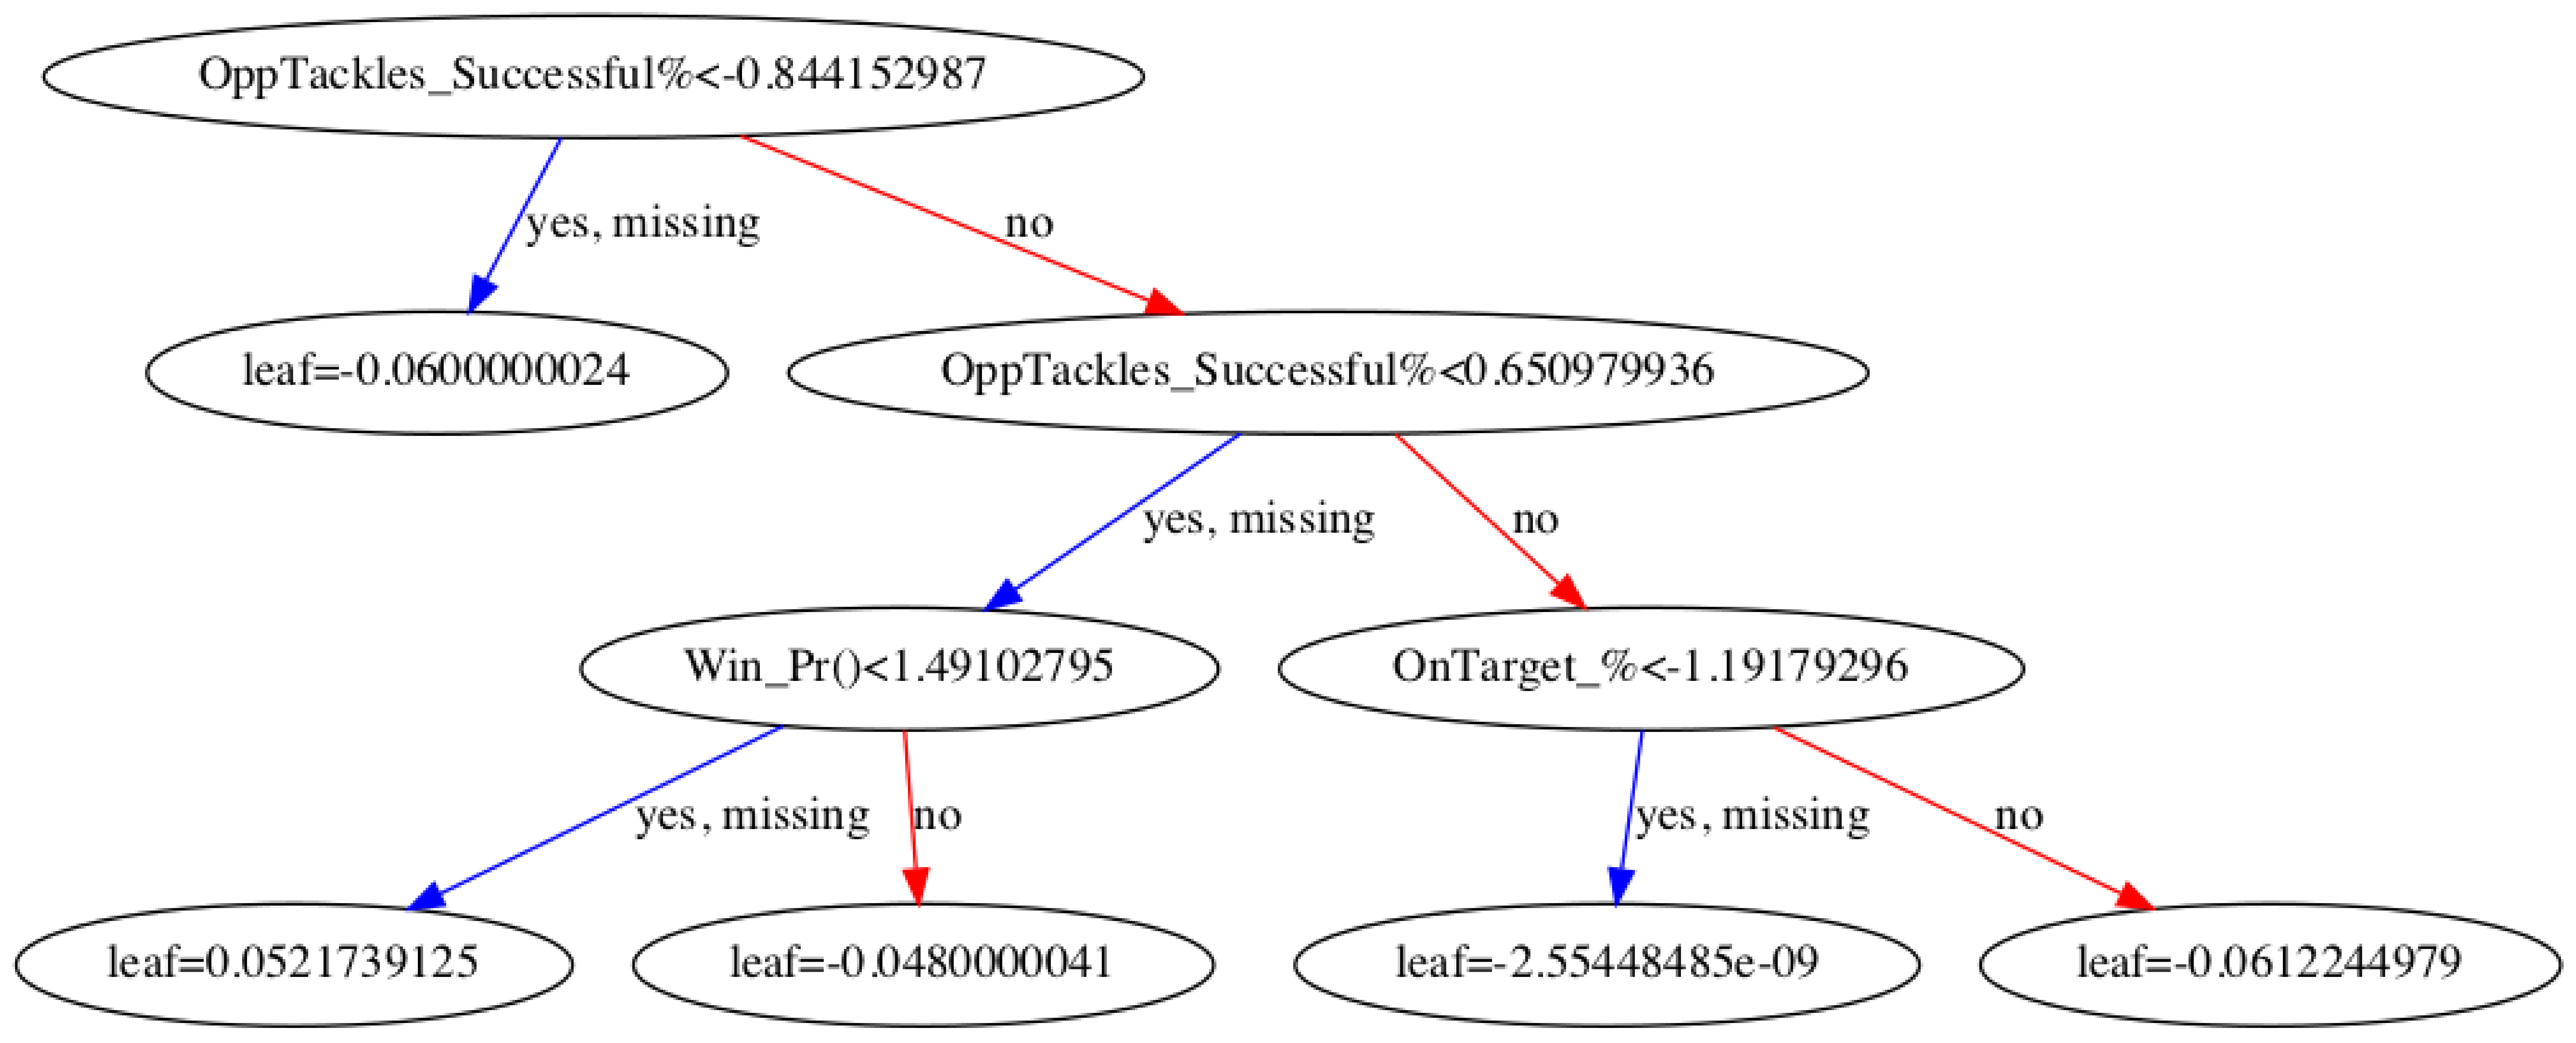

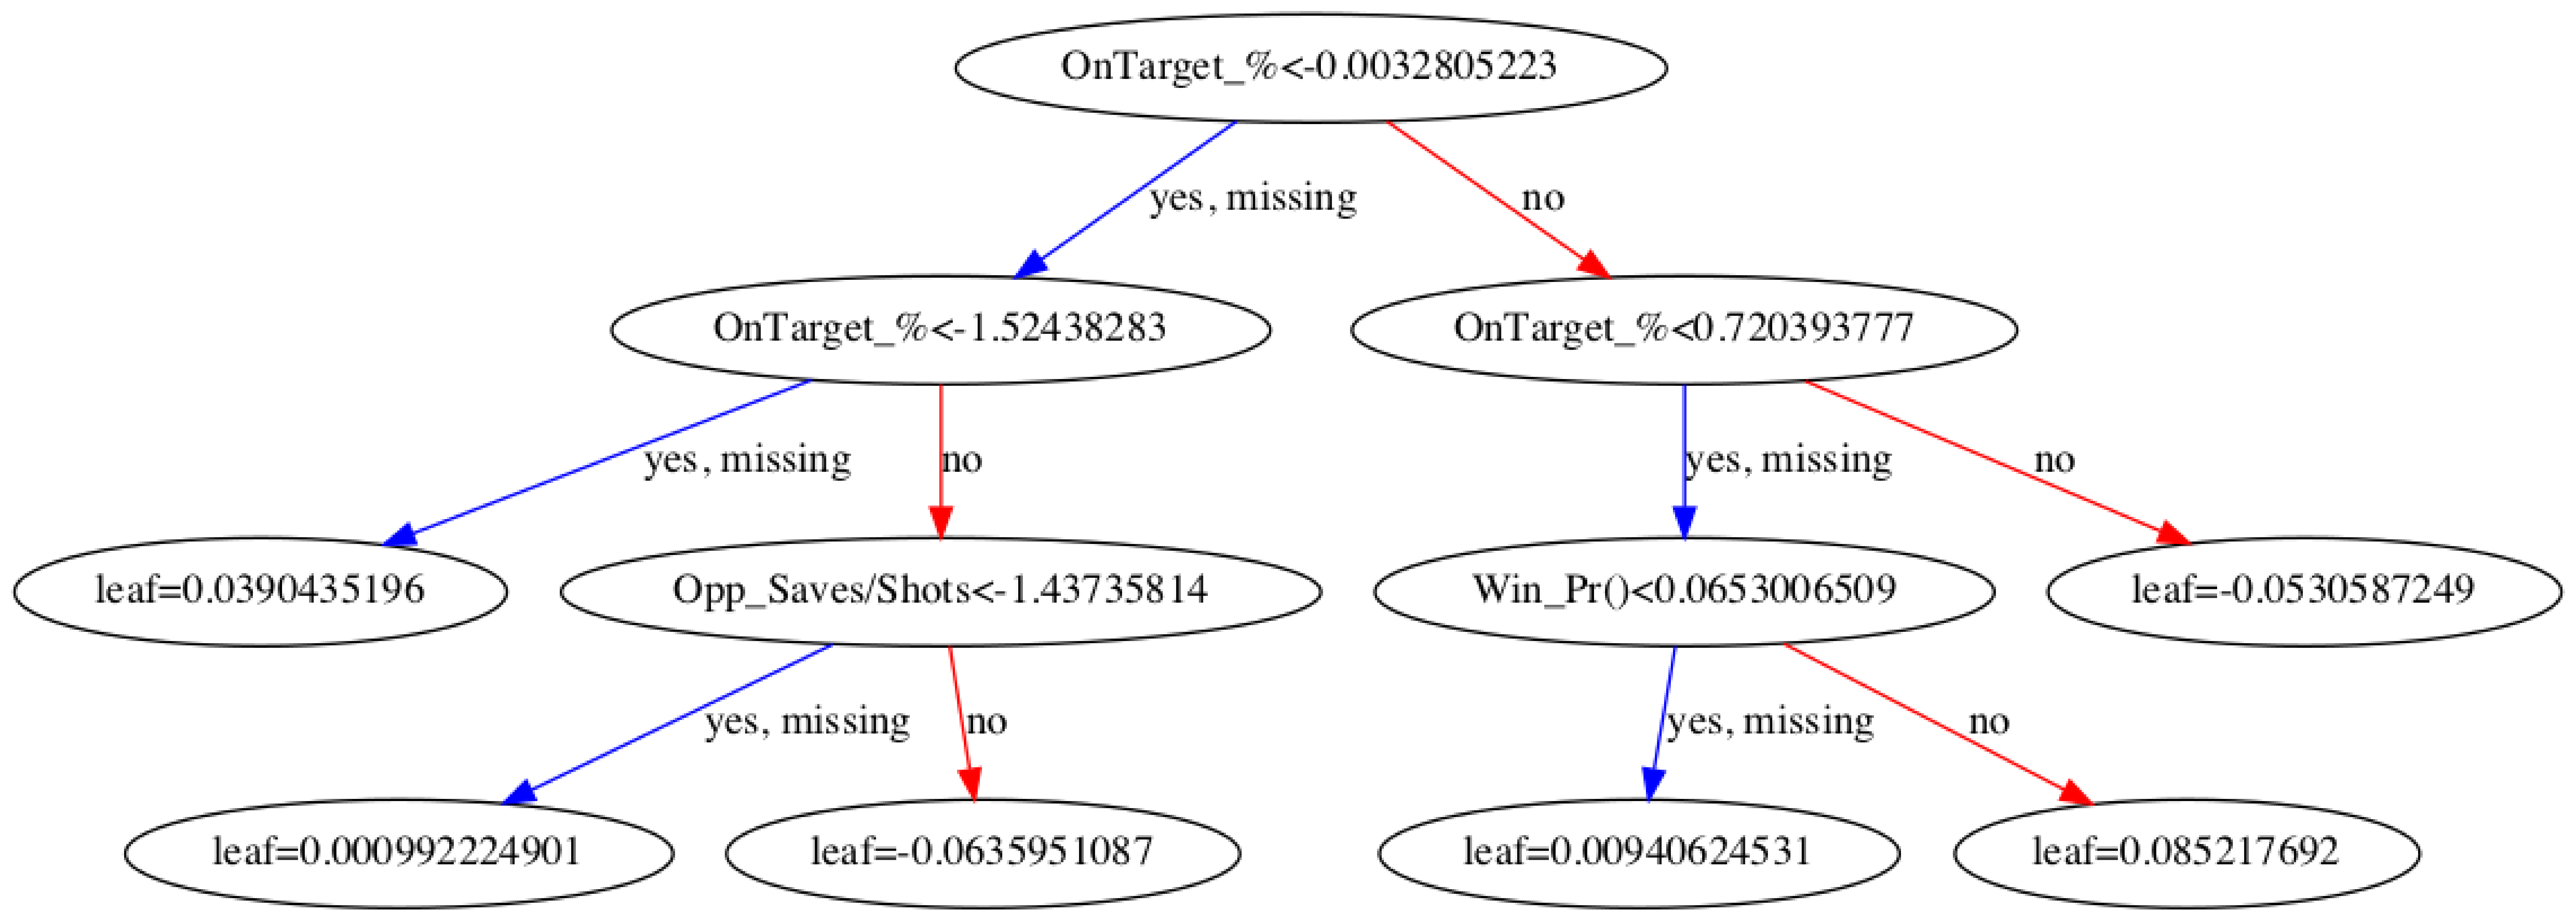

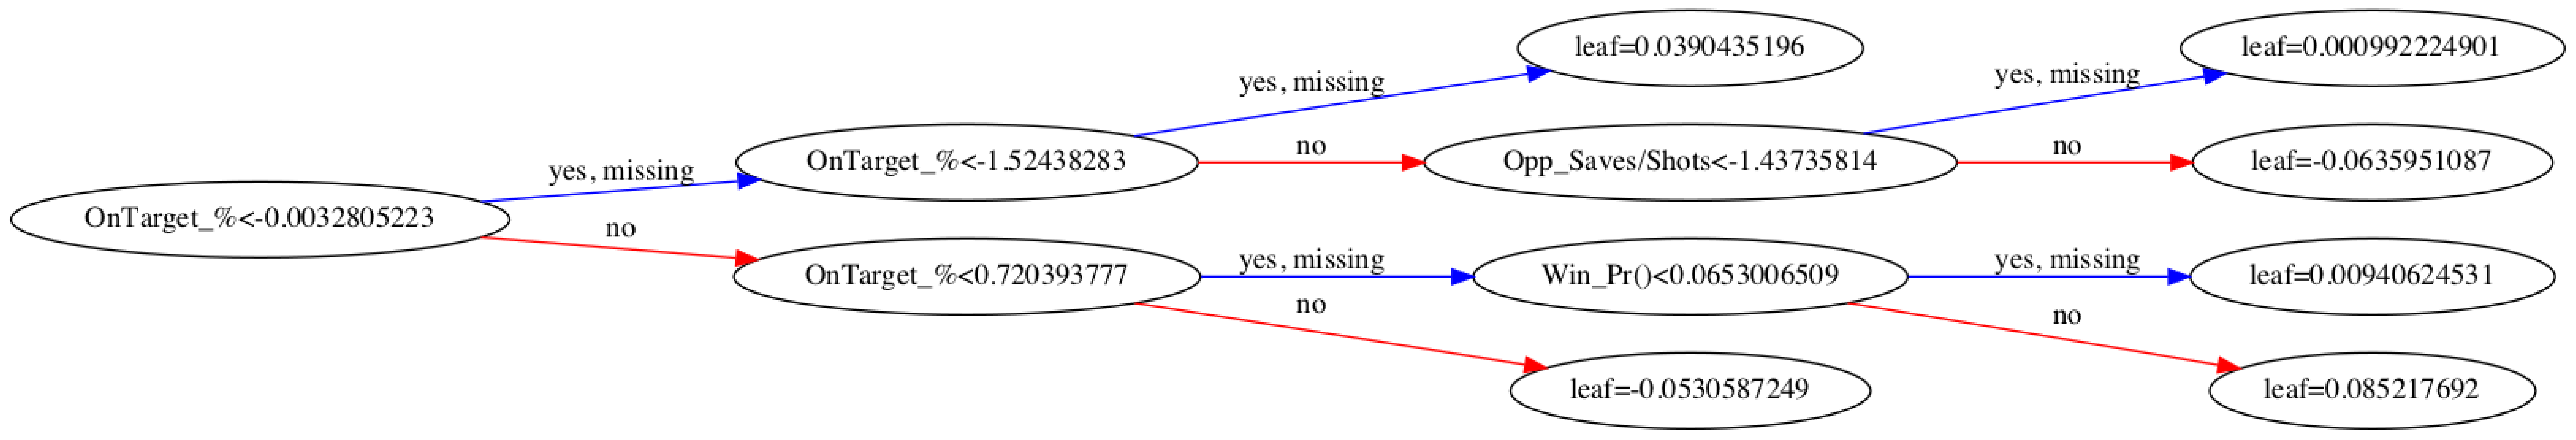

In [16]:
# Plotting a tree

from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 150,150


model=XGBClassifier()

model.fit(X,y)

#plotting the first tree
xgb.plot_tree(model)

#plotting the fourth tree
xgb.plot_tree(model, num_trees=4)

#plotting from left to right 
xgb.plot_tree(model, num_trees=4, rankdir="LR")

#fig = plt.gcf()
#fig.set_size_inches(150, 150)
#fig.savefig('xgb_tree.png')


In [18]:
#Showing Important Features: We would focus on the ones that can be improved through training 

ft_weights_xgb_reg = pd.DataFrame(model.feature_importances_, columns=['weight'], index=X.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg.head(30)

,weight
OnTarget_%,0.200050
OppTackles_Successful%,0.137905
Btts_Pr(),0.111545
Win_Pr(),0.109480
Opp_Shots_Blocked,0.102941
Succ_Ratio,0.086316
Opp_Conceded_Corners,0.079391
Opp_Saves/Shots,0.067909
Short_%,0.065391
Opp_Aggressiveness,0.039072


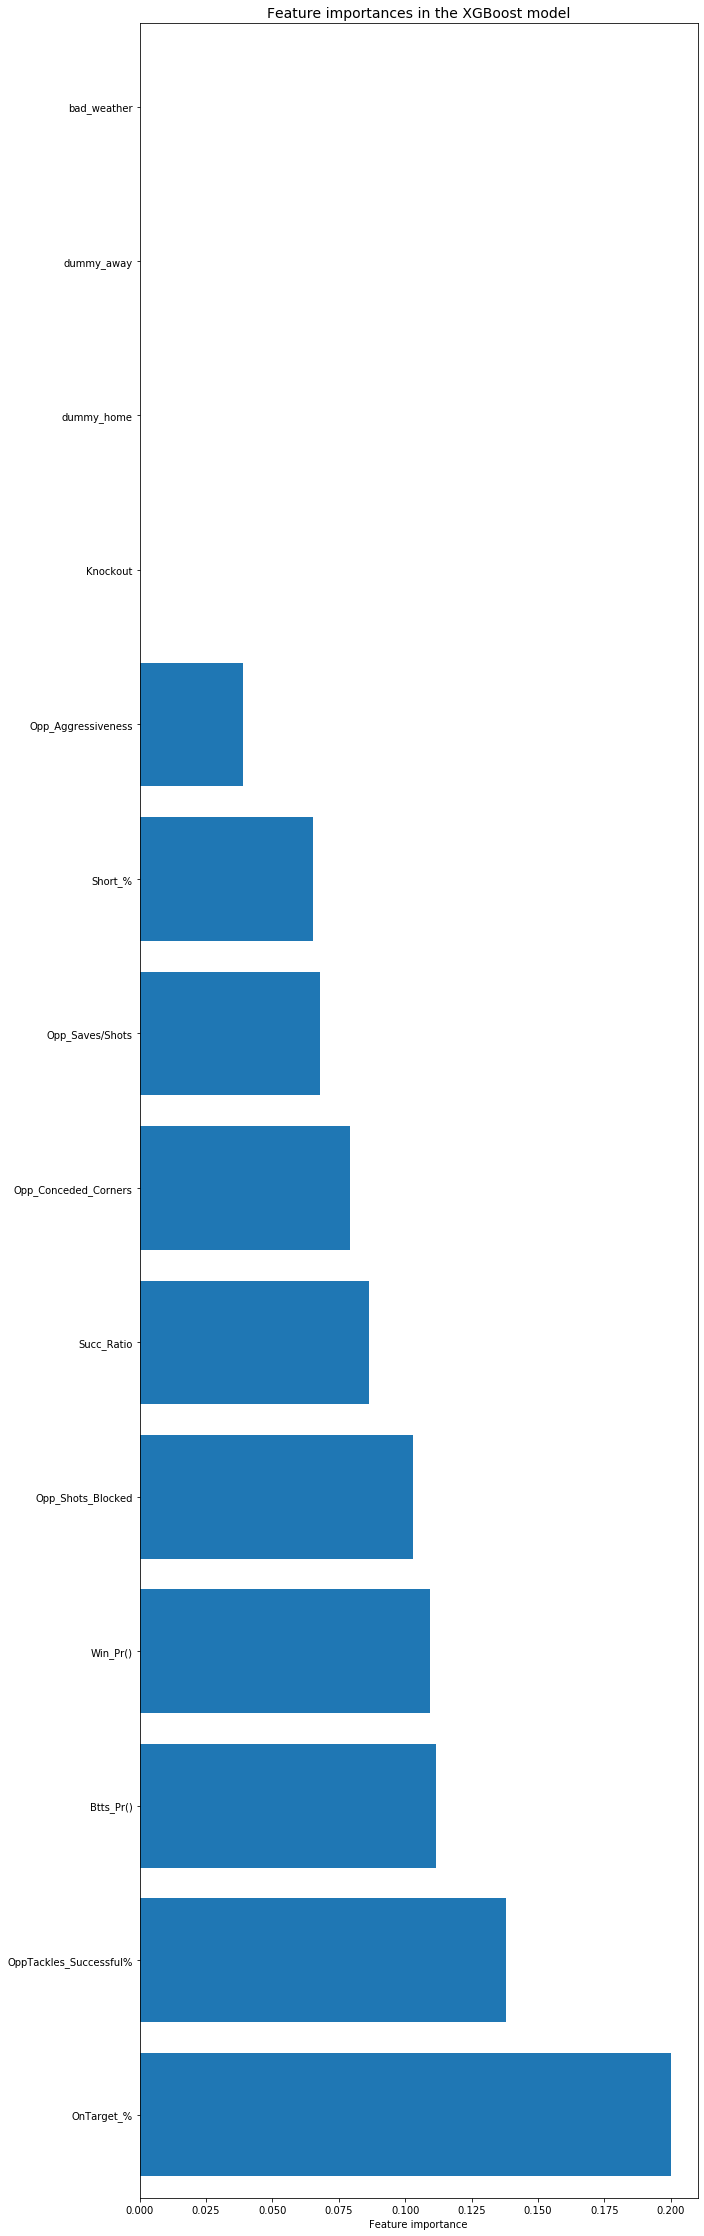

In [19]:
# Plotting feature importances graphically 
plt.figure(figsize=(10,40))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [20]:
# Plotting feature importances graphically 

sns.barplot(x=X.columns, y=model.feature_importances_)